In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.signal as sp

Load Img > Sometimes Blur > HSV > Mask > Threshold > Grayscale > Edges > Circles/Lines > Shape > Centroid. ITS SO SIMPLE.

# Load Image

(200, 500, 3)


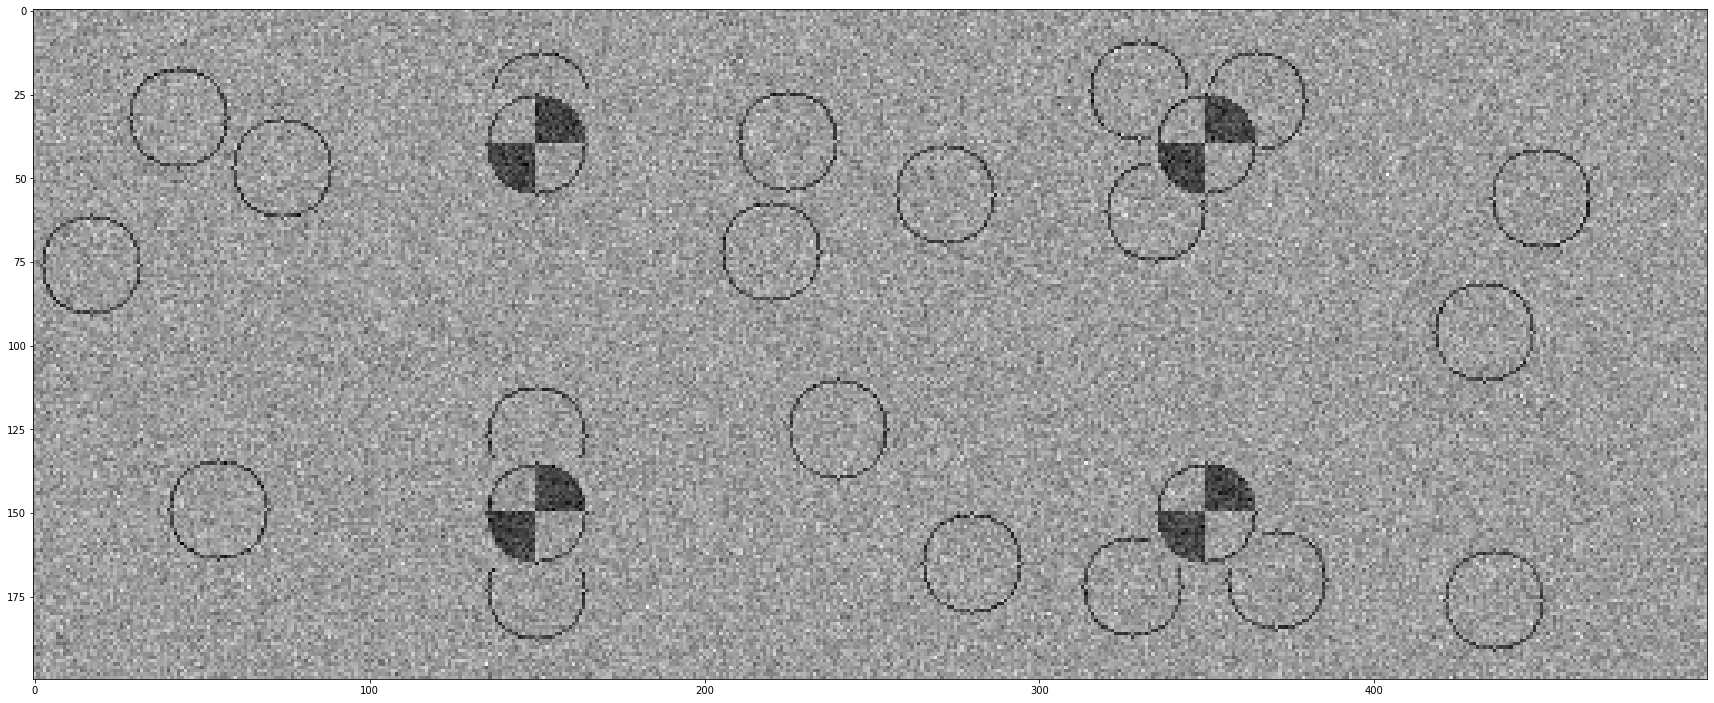

(33, 33)


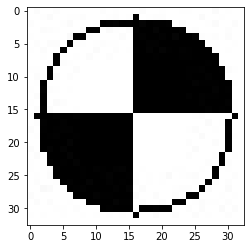

In [239]:
img = cv2.imread('sim_noisy_scene_2.jpg')
# img = cv2.imread('sim_clear_scene.jpg')
print(img.shape)
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

template = cv2.imread('template.jpg', 0)
print(template.shape)

plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.show()

## Remove noise

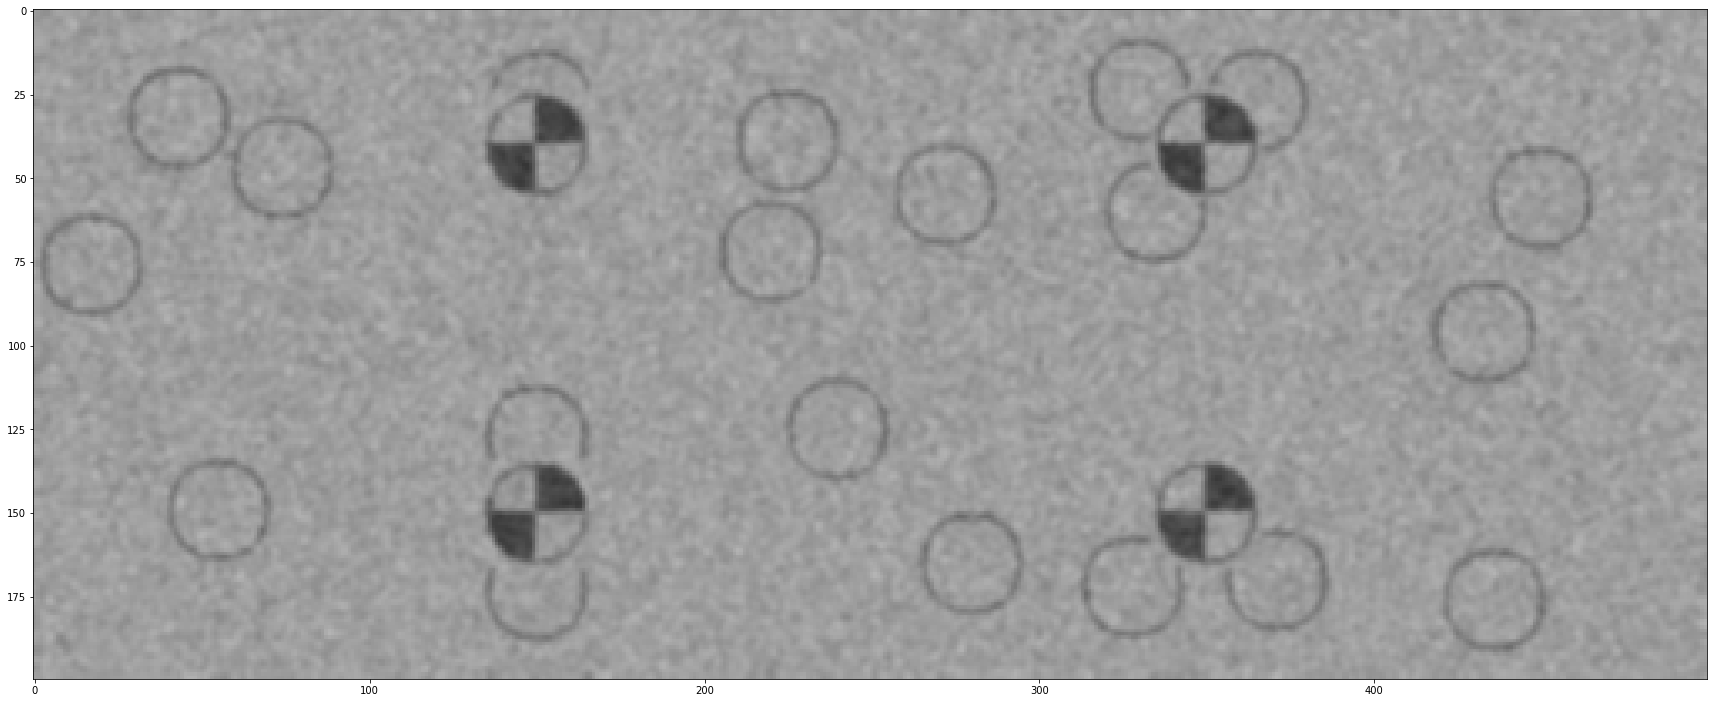

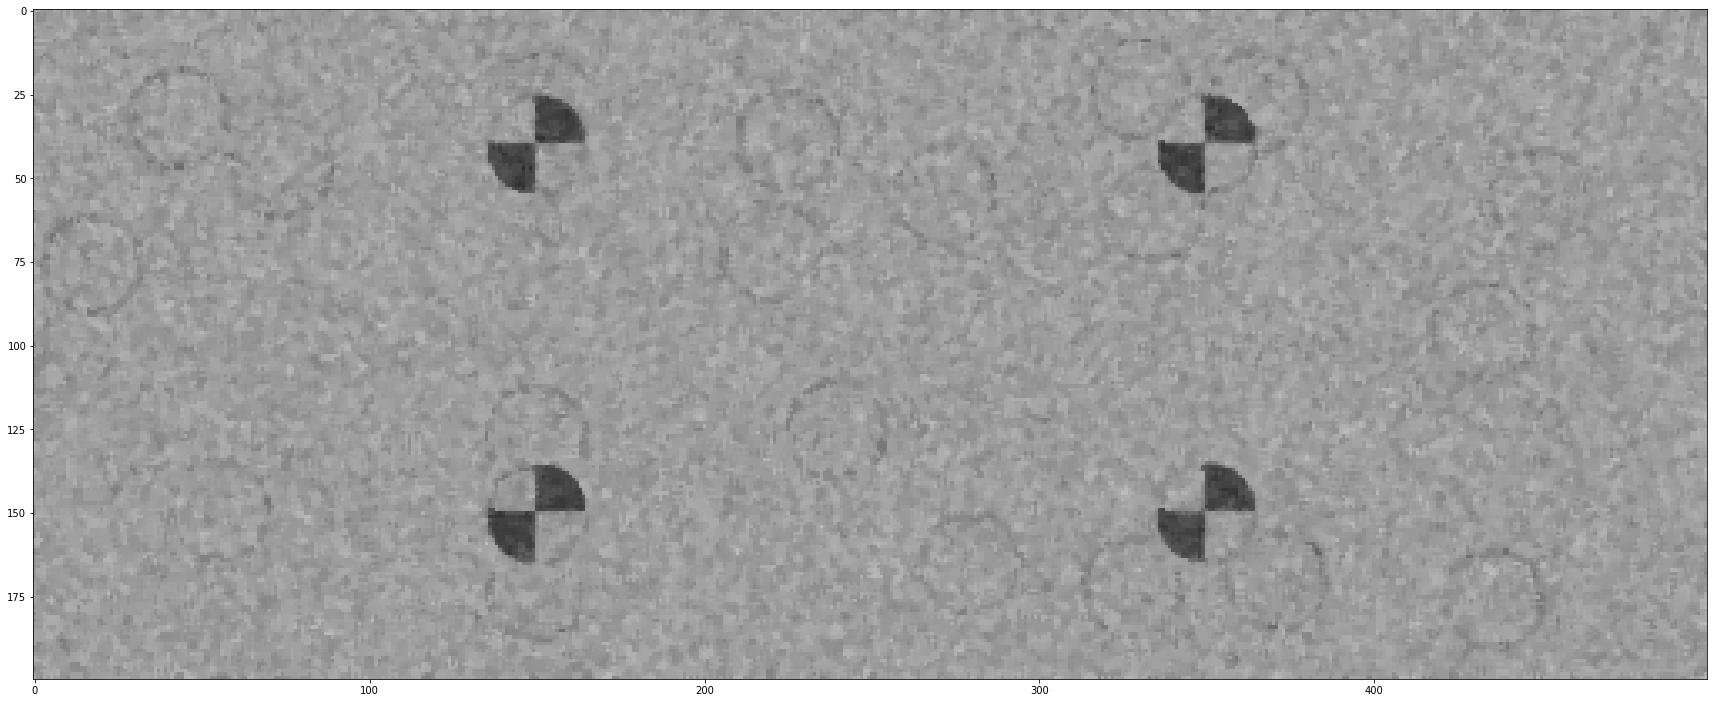

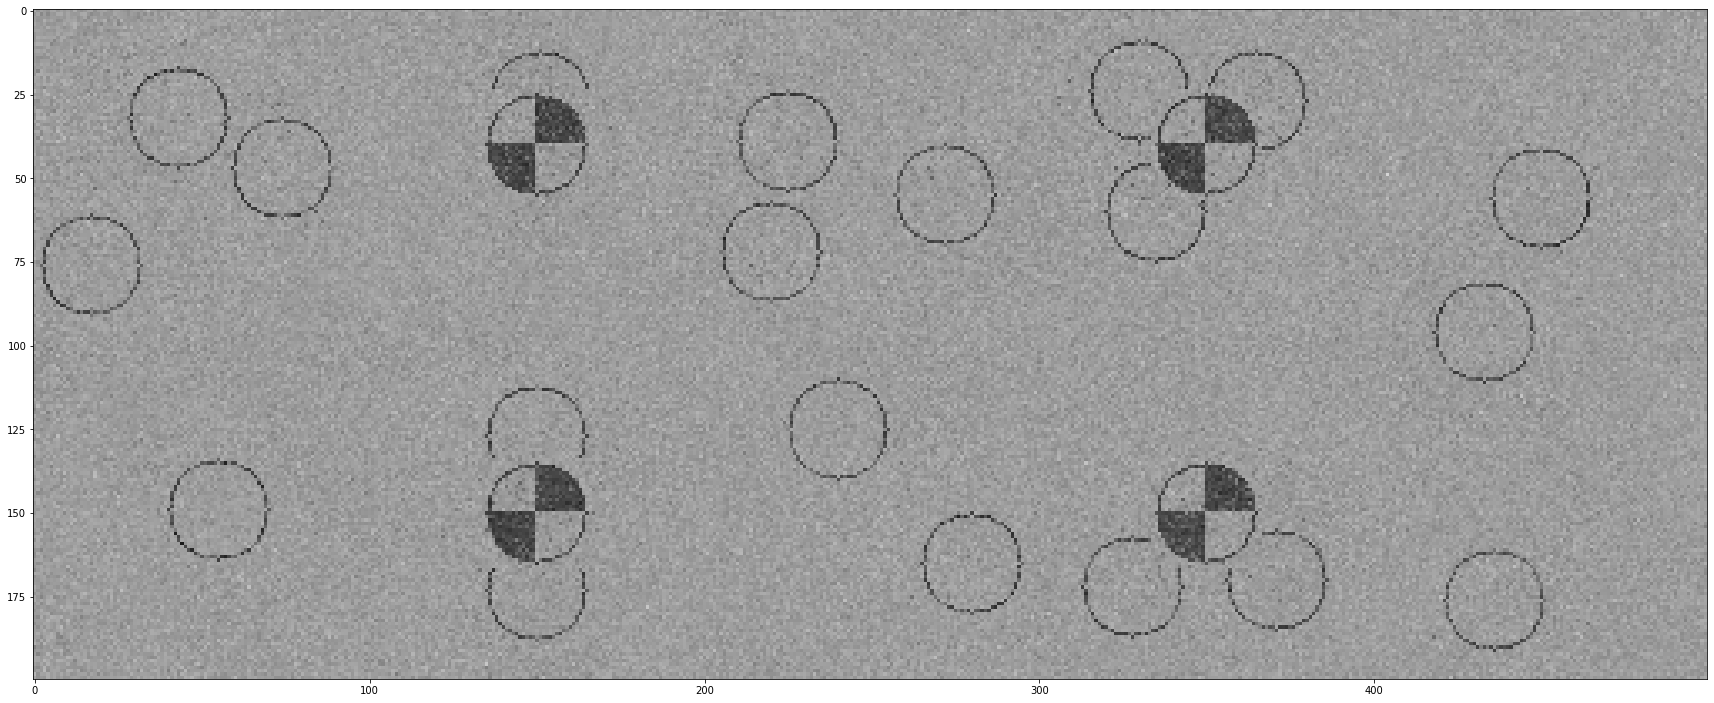

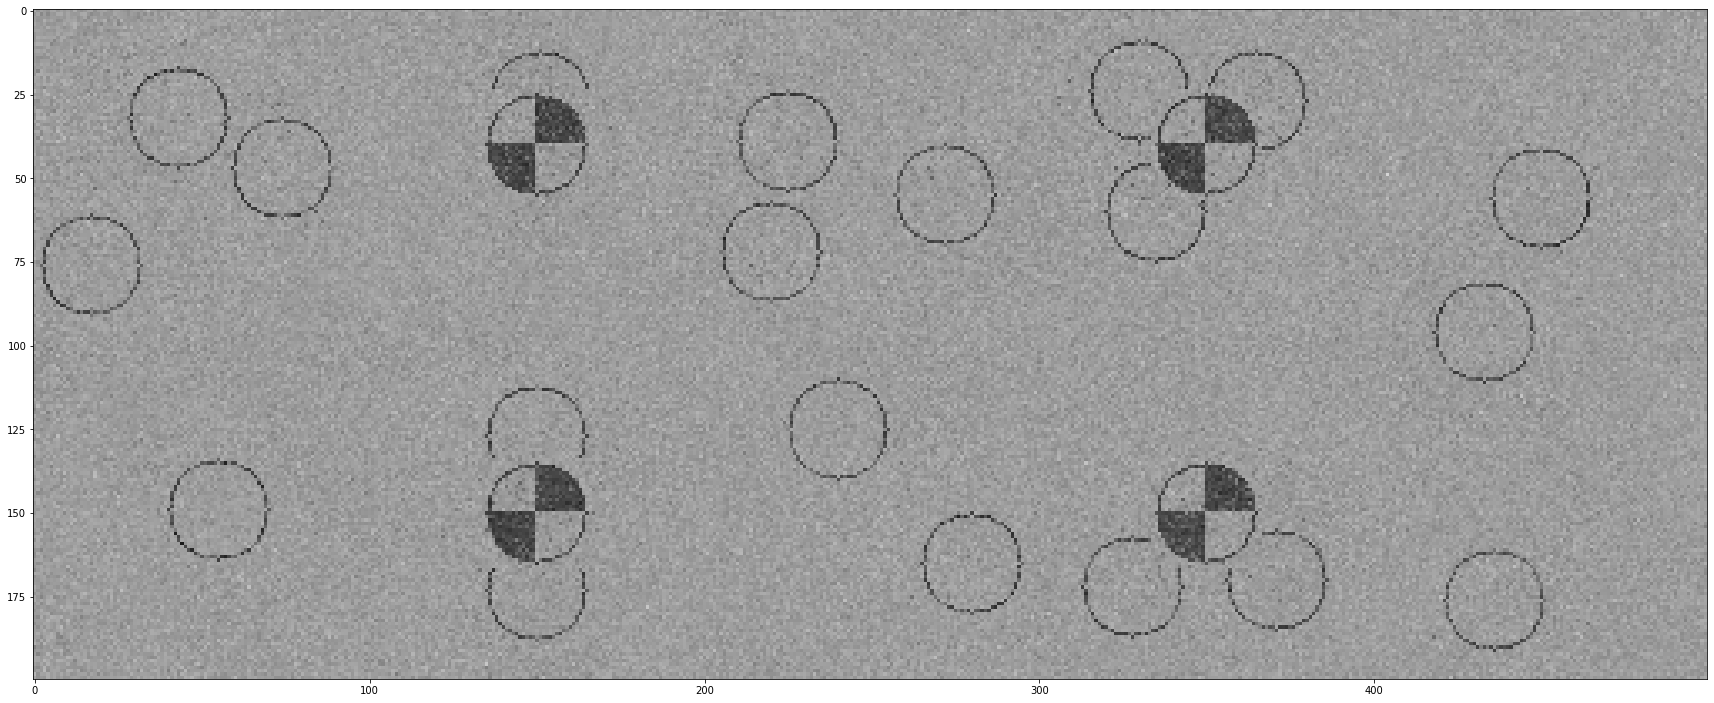

In [240]:
temp_img = np.copy(img)

# GaussianGlur
blur_sigma = 1
denoised_img_gauss = cv2.GaussianBlur(temp_img, (5, 5), blur_sigma)
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(denoised_img_gauss, cv2.COLOR_BGR2RGB))
plt.show()

# medianBlur
denoised_img_median = cv2.medianBlur(temp_img, 3)
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(denoised_img_median, cv2.COLOR_BGR2RGB))
plt.show()

# bilateralFilter
d, sigma_color, sigma_space = (30, 70, 70)
denoised_img_bifi = cv2.bilateralFilter(temp_img, d, sigma_color, sigma_space)
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(denoised_img_bifi, cv2.COLOR_BGR2RGB))
plt.show()

denoised_image = denoised_img_bifi
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.show()

## Mask

In [207]:
def color_filter_bgr(img_in, bgr, tolerance):
    """
    Inspired from https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
    """
    min_bgr = np.array([bgr[0] - tolerance, bgr[1] - tolerance, bgr[2] - tolerance])
    max_bgr = np.array([bgr[0] + tolerance, bgr[1] + tolerance, bgr[2] + tolerance])

    mask_bgr = cv2.inRange(img_in, min_bgr, max_bgr)
    img_binary = cv2.bitwise_and(img_in, img_in, mask=mask_bgr)

    return img_binary

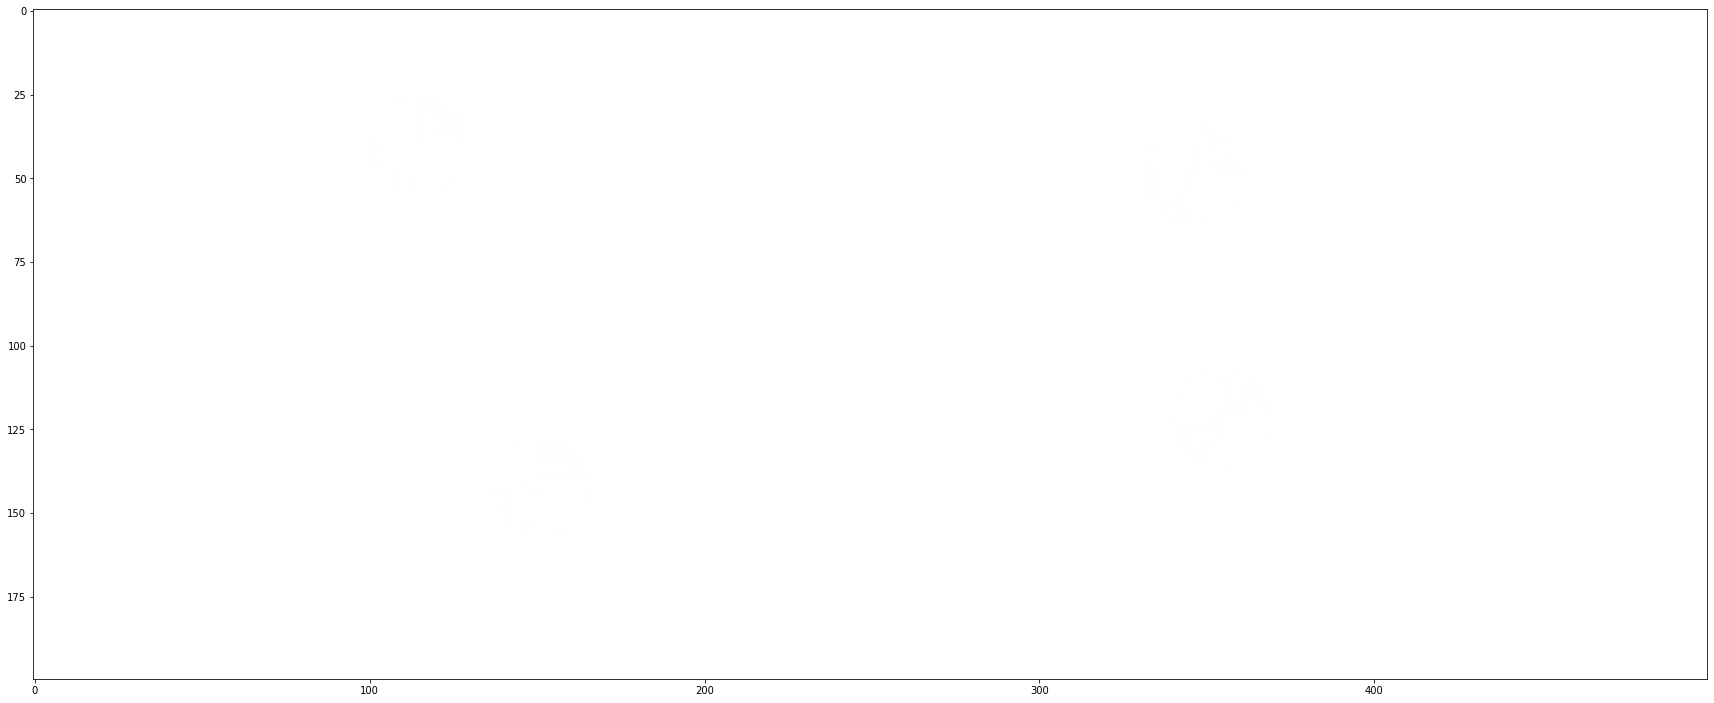

In [208]:
bgr = [0, 0, 0]
tolerance = 2
img_binary = color_filter_bgr(denoised_image, bgr, tolerance)
img_binary = cv2.bitwise_not(img_binary)

plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
plt.show()

## Template finder

In [249]:
template_img = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
results = cv2.matchTemplate(template_img, template, method=cv2.TM_CCORR_NORMED)

threshold = 0.90
loc = np.where(results >= threshold)

th, tw = template.shape[:2]

In [250]:
print(loc)

(array([ 24,  24, 134, 134]), array([134, 334, 134, 334]))


## Draw

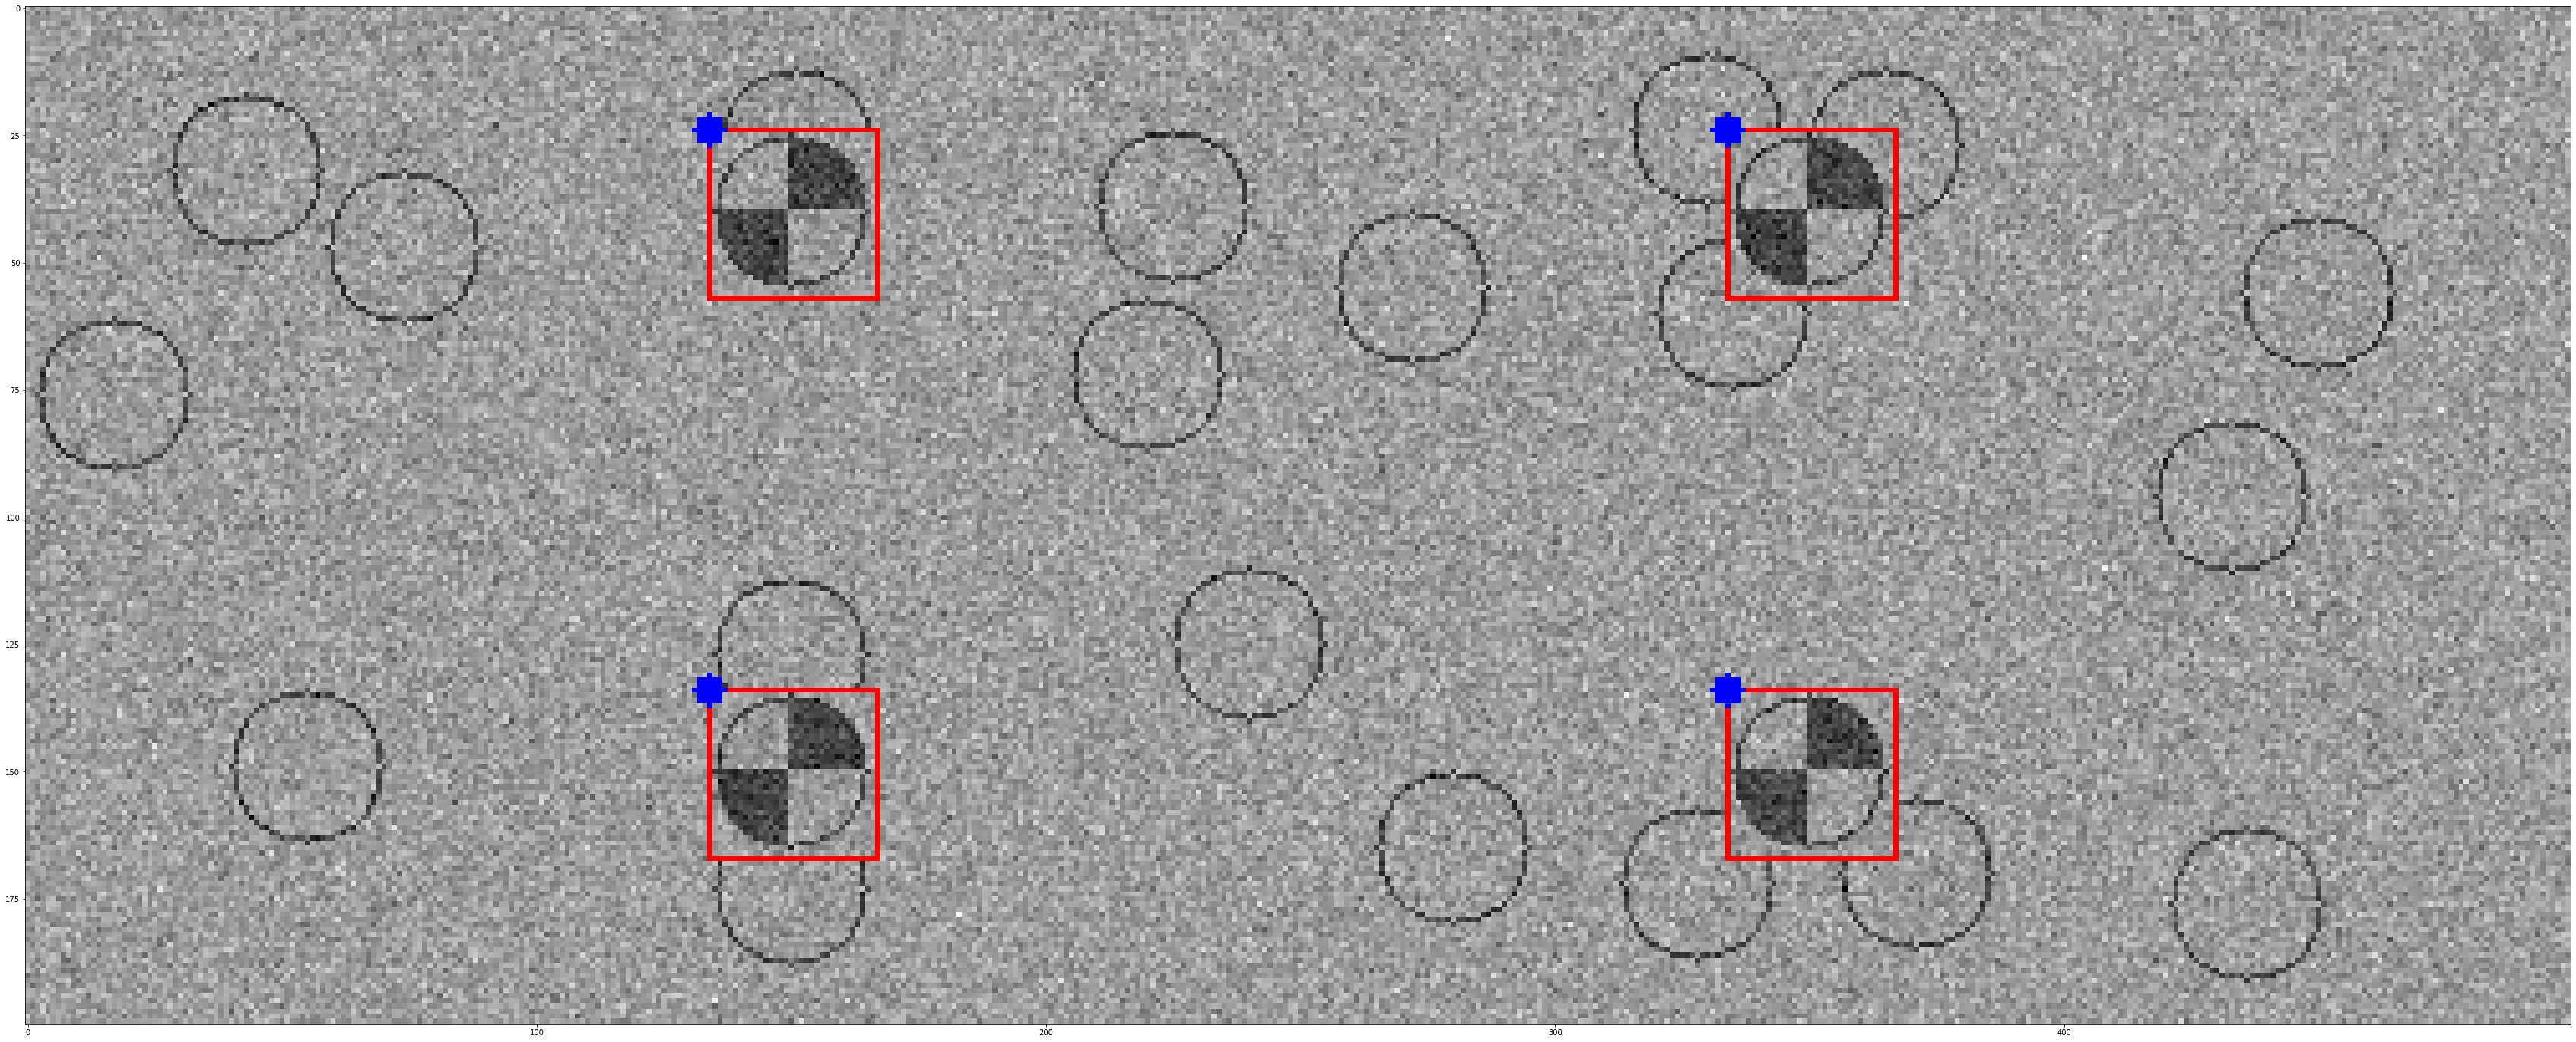

In [251]:
marked_img = np.copy(img)
for pt in zip(*loc[::-1]):
#     print(pt)
    cv2.rectangle(marked_img, pt, (pt[0] + tw, pt[1] + th), (0,0,255), 1)
    cv2.circle(marked_img, pt, 3, (255, 0, 0), -1)
    
plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.show()